Optimizing Agricultural Production

Importing Required Libraries

In [1]:
#for manipulations
import numpy as np
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact

#for analysis
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Importing the dataset and initial evaluations

In [2]:
#importing the dataset
planting_data = pd.read_csv('planting_data.csv')
planting_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
#Confirming the shape of the dataset
print('Shape of the Planting Data:', planting_data.shape)

Shape of the Planting Data: (2200, 8)


Data Audit

In [4]:
#All the columns are numerical, except the label column
planting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
#Exploring the first set of rows to understand each column and data type
planting_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
#Checking for missing values in the dataset
planting_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Exploratory Data Analysis

N                 Axes(0.125,0.53;0.168478x0.35)
P              Axes(0.327174,0.53;0.168478x0.35)
K              Axes(0.529348,0.53;0.168478x0.35)
temperature    Axes(0.731522,0.53;0.168478x0.35)
humidity          Axes(0.125,0.11;0.168478x0.35)
ph             Axes(0.327174,0.11;0.168478x0.35)
rainfall       Axes(0.529348,0.11;0.168478x0.35)
dtype: object

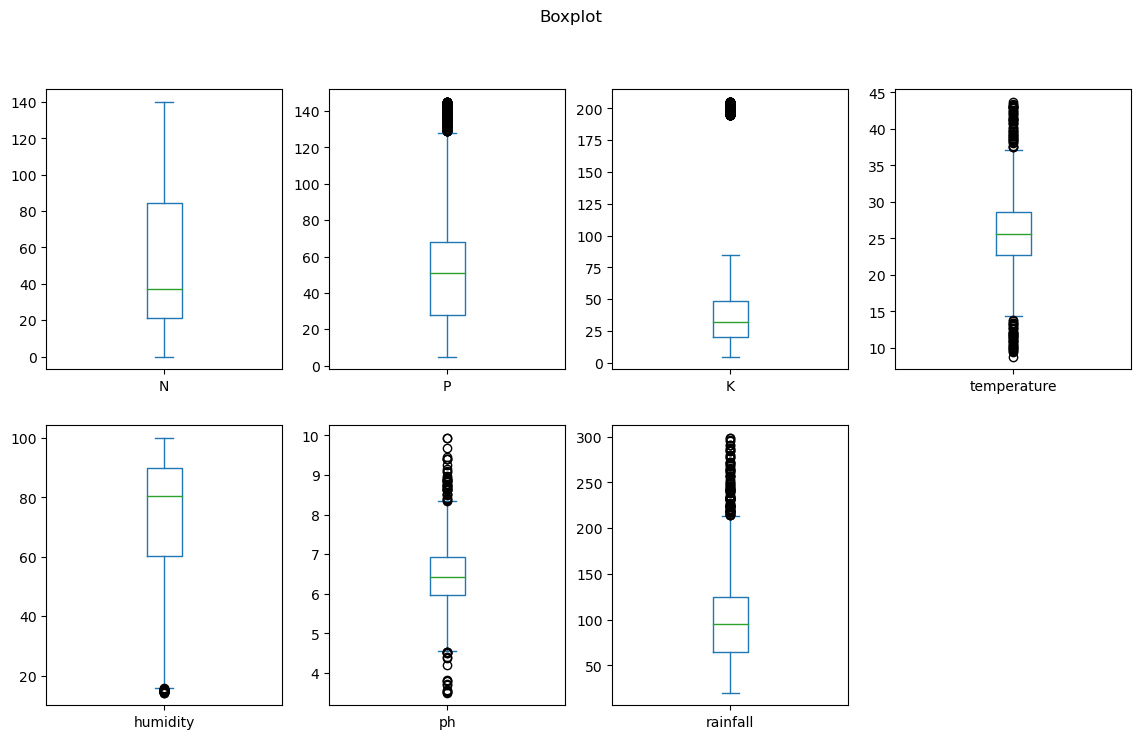

In [7]:
col_type = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

planting_data[col_type].plot(kind='box', subplots=True, layout=(2,4), figsize=(14,8), title="Boxplot")

In [8]:
#Exploring the output label to understand the number of unique crops we are working with
planting_data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

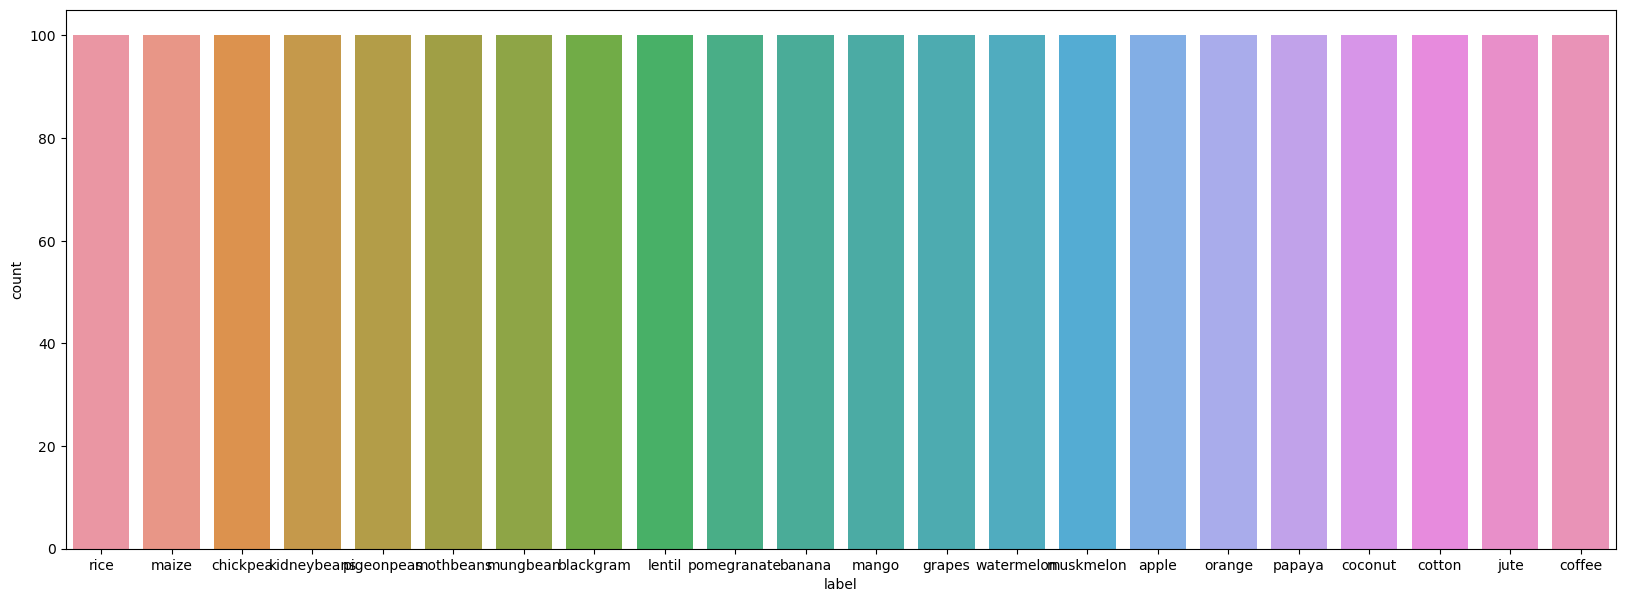

In [9]:
plt.figure(figsize = (20 , 7))
sns.countplot(x = 'label' , data = planting_data)

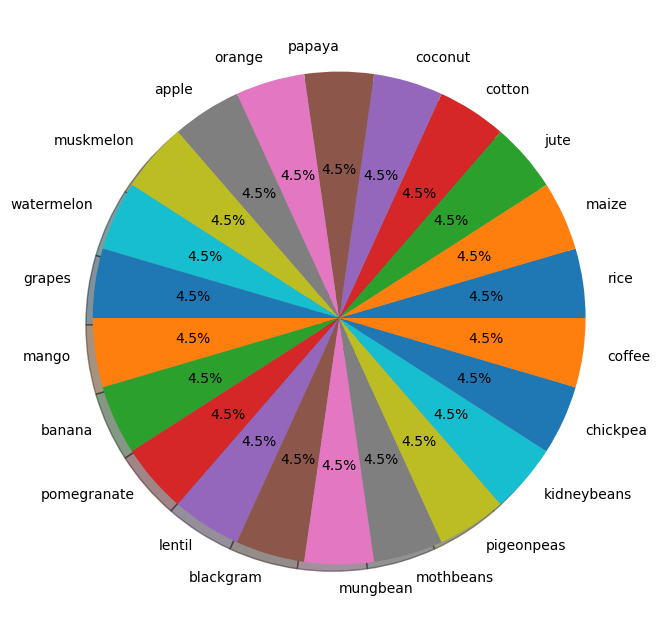

In [10]:
crop_name = planting_data['label'].value_counts().index
value = planting_data['label'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(x = value, labels = crop_name, shadow = True, autopct = '%1.1f%%')
plt.show()

In [11]:
#Understanding summary statistics for the data set

print('Average Ratio of Nitrogen in the Soil: {0:.2f}'.format(planting_data['N'].mean()))
print('Average Ratio of Phosphorus in the Soil: {0:.2f}'.format(planting_data['P'].mean()))
print('Average Ratio of Potassium in the Soil: {0:.2f}'.format(planting_data['K'].mean()))
print('Average Temperature in Celsius: {0:.2f}'.format(planting_data['temperature'].mean()))
print('Average Relative Humidity in %: {0:.2f}'.format(planting_data['humidity'].mean()))
print('Average PH Value of the Soil: {0:.2f}'.format(planting_data['ph'].mean()))
print('Average Rainfall in mm: {0:.2f}'.format(planting_data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil: 50.55
Average Ratio of Phosphorus in the Soil: 53.36
Average Ratio of Potassium in the Soil: 48.15
Average Temperature in Celsius: 25.62
Average Relative Humidity in %: 71.48
Average PH Value of the Soil: 6.47
Average Rainfall in mm: 103.46


In [12]:
#Summary Statistics for each crop

@interact
def summary(crops = list(planting_data['label'].value_counts().index)):
    x = planting_data[planting_data['label'] == crops]
    print('------------------------------------------')
    print('Soil Factors')
    print('------------------------------------------')
    print('Summary satistics for Nitrogen')
    print('Minimum nitrogen required: ', x['N'].min())
    print('Average nitrogen required: ', x['N'].mean())
    print('Maximum nitrogen required: ', x['N'].max())
    print('------------------------------------------')
    print('Summary satistics for Phosphorus')
    print('Minimum phosphorus required: ', x['P'].min())
    print('Average phosphorus required: ', x['P'].mean())
    print('Maximum phosphorus required: ', x['P'].max())
    print('------------------------------------------')
    print('Summary satistics for Potassium')
    print('Minimum potassium required: ', x['K'].min())
    print('Average potassium required: ', x['K'].mean())
    print('Maximum potassium required: ', x['K'].max())
    print('------------------------------------------')
    print('Summary satistics for PH')
    print('Minimum pH required: {0:.2f}'.format(x['ph'].min()))
    print('Average pH required: {0:.2f}'.format(x['ph'].mean()))
    print('Maximum pH required: {0:.2f}'.format(x['ph'].max()))
    print('------------------------------------------')
    print('------------------------------------------')
    print('Climatic Factors')
    print('------------------------------------------')
    print('Summary satistics for Temperature')
    print('Minimum Temperature required: {0:.2f}'.format(x['temperature'].min()))
    print('Average Temperature required: {0:.2f}'.format(x['temperature'].mean()))
    print('Maximum Temperature required: {0:.2f}'.format(x['temperature'].max()))
    print('------------------------------------------')
    print('Summary satistics for Humidity')
    print('Minimum humidity required: {0:.2f}'.format(x['humidity'].min()))
    print('Average humidity required: {0:.2f}'.format(x['humidity'].mean()))
    print('Maximum Humidity required: {0:.2f}'.format(x['humidity'].max()))
    print('------------------------------------------')
    print('Summary satistics for Rainfall')
    print('Minimum rainfall required: {0:.2f}'.format(x['rainfall'].min()))
    print('Average rainfall required: {0:.2f}'.format(x['rainfall'].mean()))
    print('Maximum rainfall required: {0:.2f}'.format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [13]:
#Comparing the average requirement for each crop with the average conditions

@interact
def compare(conditions = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']):
    print('Average value for', conditions, 'is {0:.2f}'.format(planting_data[conditions].mean()))
    print('------------------------------------------')
    print('Rice: {0:.2f}'.format(planting_data[(planting_data['label'] == 'rice')][conditions].mean()))
    print('Maize: {0:.2f}'.format(planting_data[(planting_data['label'] == 'maize')][conditions].mean()))
    print('Jute: {0:.2f}'.format(planting_data[(planting_data['label'] == 'jute')][conditions].mean()))
    print('Cotton: {0:.2f}'.format(planting_data[(planting_data['label'] == 'cotton')][conditions].mean()))
    print('Coconut: {0:.2f}'.format(planting_data[(planting_data['label'] == 'coconut')][conditions].mean()))
    print('Papaya: {0:.2f}'.format(planting_data[(planting_data['label'] == 'papaya')][conditions].mean()))
    print('Orange: {0:.2f}'.format(planting_data[(planting_data['label'] == 'orange')][conditions].mean()))
    print('Apple: {0:.2f}'.format(planting_data[(planting_data['label'] == 'apple')][conditions].mean()))
    print('Muskmelon: {0:.2f}'.format(planting_data[(planting_data['label'] == 'muskmelon')][conditions].mean()))
    print('Watermelon: {0:.2f}'.format(planting_data[(planting_data['label'] == 'watermelon')][conditions].mean()))
    print('Grapes: {0:.2f}'.format(planting_data[(planting_data['label'] == 'grapes')][conditions].mean()))
    print('Mango: {0:.2f}'.format(planting_data[(planting_data['label'] == 'mango')][conditions].mean()))
    print('Banana: {0:.2f}'.format(planting_data[(planting_data['label'] == 'banana')][conditions].mean()))
    print('Pomegranate: {0:.2f}'.format(planting_data[(planting_data['label'] == 'pomegranate')][conditions].mean()))
    print('Lentil: {0:.2f}'.format(planting_data[(planting_data['label'] == 'lentil')][conditions].mean()))
    print('Blackgram: {0:.2f}'.format(planting_data[(planting_data['label'] == 'blackgram')][conditions].mean()))
    print('Mungbean: {0:.2f}'.format(planting_data[(planting_data['label'] == 'mungbean')][conditions].mean()))
    print('Mothbeans: {0:.2f}'.format(planting_data[(planting_data['label'] == 'mothbeans')][conditions].mean()))
    print('Pigeonpeas: {0:.2f}'.format(planting_data[(planting_data['label'] == 'pigeonpeas')][conditions].mean()))
    print('Kidneybeans: {0:.2f}'.format(planting_data[(planting_data['label'] == 'kidneybeans')][conditions].mean()))
    print('Chickpeas: {0:.2f}'.format(planting_data[(planting_data['label'] == 'chickpeas')][conditions].mean()))
    print('Coffee: {0:.2f}'.format(planting_data[(planting_data['label'] == 'coffee')][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'ph', 'temperature', 'humidit…

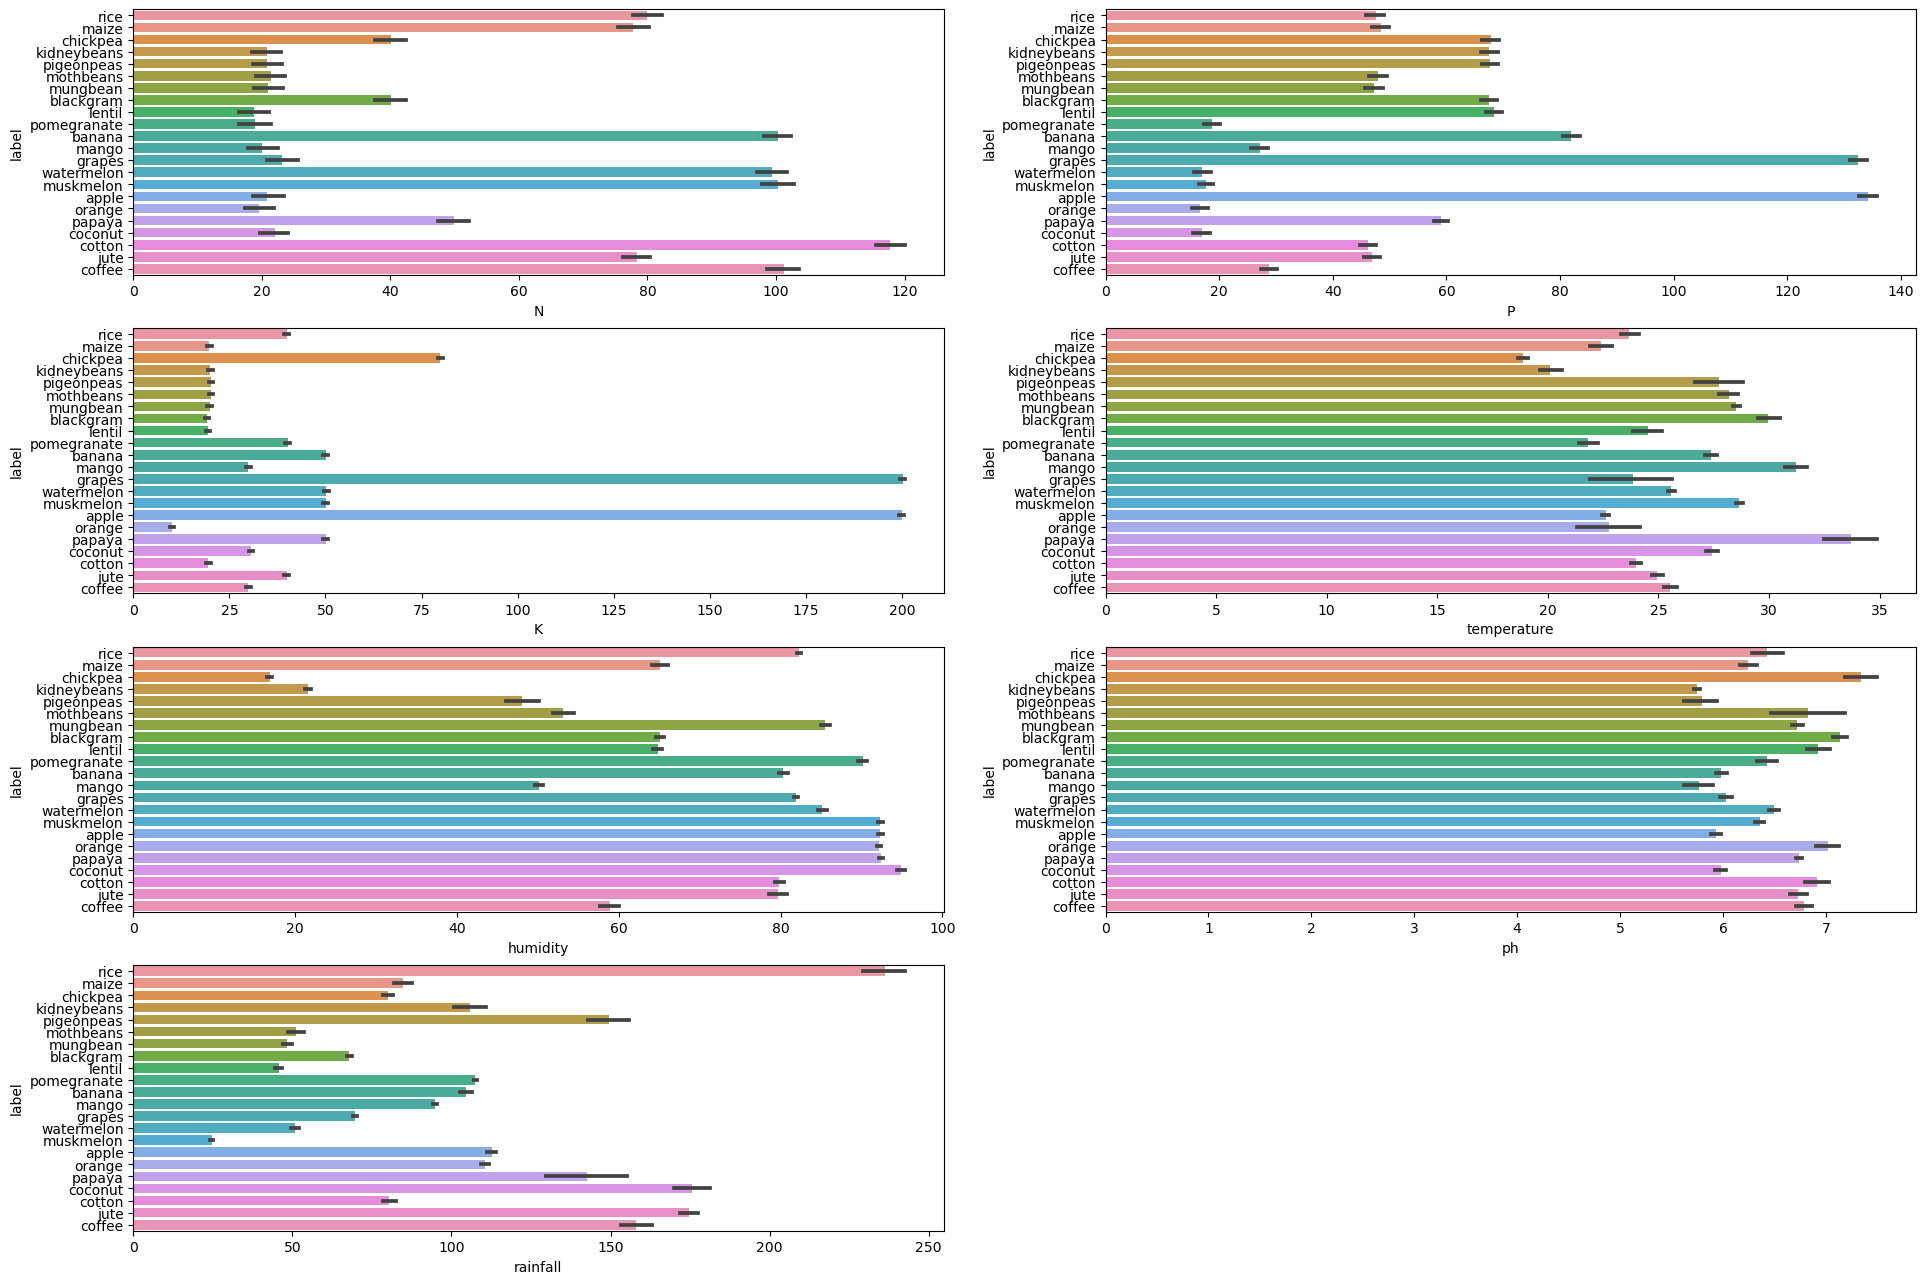

In [14]:
# Barplots 

columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'label'

def create_barplots(planting_data, columns) :
    
    i = 1
    plt.figure(figsize = (23,20))
    for col_name in columns:
        plt.subplot(5,2,i)
        sns.barplot(data = planting_data, x = col_name , y = target)
        i += 1 
        
create_barplots(planting_data, columns)

In [15]:
@interact
def compare(conditions = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']):
    print('Crops which require greater than average', conditions)
    print(planting_data[planting_data[conditions] > planting_data[conditions].mean()]['label'].unique())
    print('------------------------------------------')
    print('Crops which require lesser than average', conditions, '\n')
    print(planting_data[planting_data[conditions] <= planting_data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'ph', 'temperature', 'humidit…

Distributions

In [ ]:
#Analyzing the distribution of the agricultural conditions
#

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(planting_data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 1)
sns.distplot(planting_data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorus', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 1)
sns.distplot(planting_data['K'], color = 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 1)
sns.distplot(planting_data['ph'], color = 'darkgrey')
plt.xlabel('Ratio of PH', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 1)
sns.distplot(planting_data['temperature'], color = 'lightgreen')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 1)
sns.distplot(planting_data['humidity'], color = 'darkgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 1)
sns.distplot(planting_data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

In [16]:
#Taking a deeper dive into the dataset


print('Uncovering some hidden patterns')
print('------------------------------------------')
print('Crops which require very high ratio of nitrogen content in the soil:', planting_data[planting_data['N'] > 120]['label'].unique())
print('Crops which require very high ratio of phosphorus content in the soil:', planting_data[planting_data['P'] > 100]['label'].unique())
print('Crops which require very high ratio of potassium content in the soil:', planting_data[planting_data['K'] > 200]['label'].unique())
print('Crops which require very high ph:', planting_data[planting_data['ph'] > 9]['label'].unique())
print('Crops which require very low ph:', planting_data[planting_data['ph'] < 4]['label'].unique())
print('Crops which require very high temperature:', planting_data[planting_data['temperature'] > 40]['label'].unique())
print('Crops which require very low temperature:', planting_data[planting_data['temperature'] < 10]['label'].unique())
print('Crops which require very low humidity:', planting_data[planting_data['humidity'] < 20]['label'].unique())
print('Crops which require very high rainfall:', planting_data[planting_data['rainfall'] > 200]['label'].unique())

Uncovering some hidden patterns
------------------------------------------
Crops which require very high ratio of nitrogen content in the soil: ['cotton']
Crops which require very high ratio of phosphorus content in the soil: ['grapes' 'apple']
Crops which require very high ratio of potassium content in the soil: ['grapes' 'apple']
Crops which require very high ph: ['mothbeans']
Crops which require very low ph: ['mothbeans']
Crops which require very high temperature: ['grapes' 'papaya']
Crops which require very low temperature: ['grapes']
Crops which require very low humidity: ['chickpea' 'kidneybeans']
Crops which require very high rainfall: ['rice' 'papaya' 'coconut']


In [17]:
#Understaing which seasons are best to grow each crop

print('Crops suitable for Summer season')
print(planting_data[(planting_data['temperature'] > 30) & (planting_data['humidity'] > 50)]['label'].unique())
print('------------------------------------------')
print('Crops suitable for Winter season')
print(planting_data[(planting_data['temperature'] < 20) & (planting_data['humidity'] > 30)]['label'].unique())
print('------------------------------------------')
print('Crops suitable for Rainy season')
print(planting_data[(planting_data['rainfall'] > 200) & (planting_data['humidity'] > 30)]['label'].unique())


Crops suitable for Summer season
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------
Crops suitable for Winter season
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------
Crops suitable for Rainy season
['rice' 'papaya' 'coconut']


In [18]:
#Analyzing similar crops (using KMeans) based on clustering analysis to help the farmer clasify multiple crops that can br grown under similar conditions

x = planting_data.loc[:, ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']].values

print(x.shape)

x_df = pd.DataFrame(x)
x_df.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,6.502985,20.879744,82.002744,202.935536
1,85.0,58.0,41.0,7.038096,21.770462,80.319644,226.655537
2,60.0,55.0,44.0,7.840207,23.004459,82.320763,263.964248
3,74.0,35.0,40.0,6.980401,26.491096,80.158363,242.864034
4,78.0,42.0,42.0,7.628473,20.130175,81.604873,262.717340


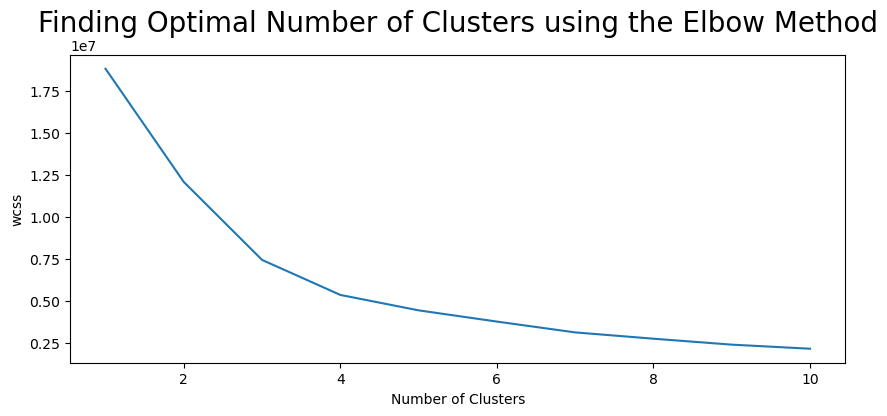

In [19]:
#Using the elbow method to determine the optimum number of clusters available within the data set
#Two elbows are available in the dataset. Using the latest one - 4 elbows

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('Finding Optimal Number of Clusters using the Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [20]:
#Implementing Kmeans algorithm to perform clustering analysis
#farmer can select alternate crops from the same cluster to maximize productivity

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Results
a = planting_data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Exploring the cluster for each crop
print('Results after applying the KMeans algorithm')
print('Crops in first cluster:', z[z['cluster'] == 0]['label'].unique())
print('------------------------------------------')
print('Crops in second cluster:', z[z['cluster'] == 1]['label'].unique())
print('------------------------------------------')
print('Crops in third cluster:', z[z['cluster'] == 2]['label'].unique())
print('------------------------------------------')
print('Crops in fourth cluster:', z[z['cluster'] == 3]['label'].unique())

Results after applying the KMeans algorithm
Crops in first cluster: ['grapes' 'apple']
------------------------------------------
Crops in second cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------
Crops in third cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------
Crops in fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [21]:
#Using Logistic Regression (Predictive modelling) to train the model and suggest the most suitable crop based on the soil and climatic requirements

#Splitting the dataset for predictive modelling
y = planting_data['label']
x = planting_data.drop(['label'], axis = 1)

print('Shape of X:', x.shape)
print('Shape of Y:', y.shape)

Shape of X: (2200, 7)
Shape of Y: (2200,)


In [22]:
#Splitting the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print('Shape of X Train:', x_train.shape)
print('Shape of X Test:', x_test.shape)
print('Shape of Y Train:', y_train.shape)
print('Shape of Y Test:', y_test.shape)

Shape of X Train: (1760, 7)
Shape of X Test: (440, 7)
Shape of Y Train: (1760,)
Shape of Y Test: (440,)


In [23]:
#Building the predictive model

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [24]:
#Evaluating the model performance

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [25]:
#Testing out the model to predict a crop based on parameters - Real time predictions

prediction = model.predict((np.array([[90, 40, 40, 20, 80, 7, 200]])))

print('The suggested crop for the given climatic and soil conditions is:', prediction)

The suggested crop for the given climatic and soil conditions is: ['rice']
